### Load data into a dataframe

In [1]:
house_data <- read.csv(file="kc_house_data.csv", header=TRUE, sep=",")
train_data <- read.csv(file="kc_house_train_data.csv", header=TRUE, sep=",")
test_data_house  <- read.csv(file="kc_house_test_data.csv", header=TRUE, sep=",")

In [2]:
head(house_data)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


## plot area/price 

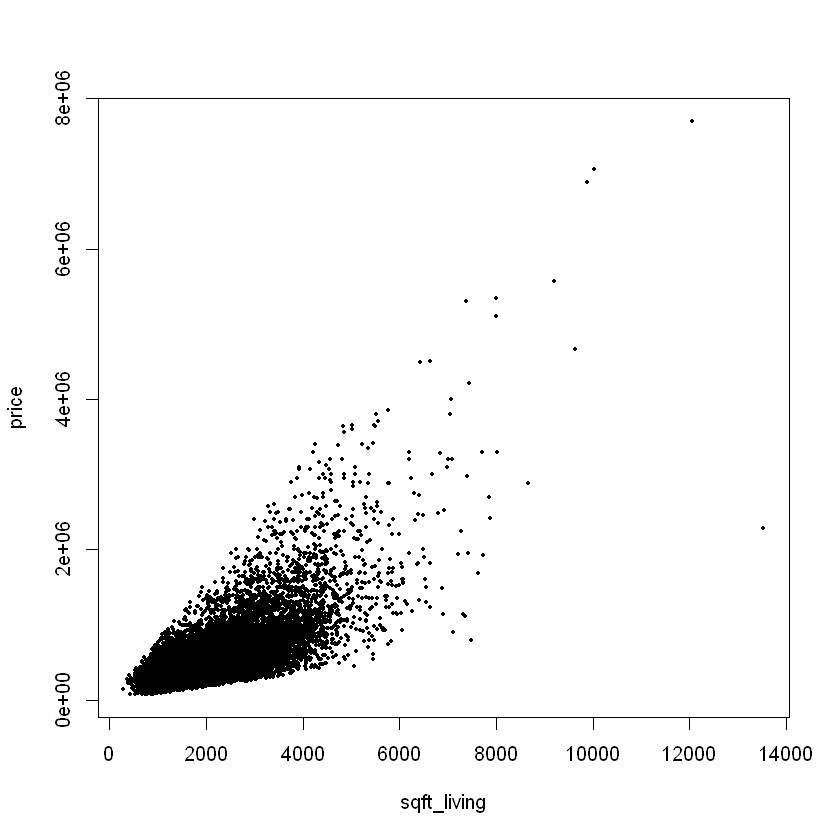

In [3]:
with(house_data, plot(sqft_living, price,cex=0.6, pch=20:20))

#### Write a generic function that accepts a column of data (e.g, an SArray) ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’. Use the closed form solution from lecture to calculate the slope and intercept.

In [4]:
get_slope_intercept_for_feature <- function(data, input_feature, output_feature){
    rows = nrow(data)
    s_input_f = sum(data[, input_feature])
    s_output_f = sum(data[, output_feature])
    s_feature_product = sum(data[, input_feature] * data[, output_feature])
    s_input_f_squared = sum(data[, input_feature] * data[, input_feature])
    
    numerator = s_feature_product - (1 / rows) * (s_input_f * s_output_f)
    denominator = s_input_f_squared - (1 / rows) * (as.numeric(s_input_f) * as.numeric(s_input_f))
    
    slope = numerator / denominator
    intercept = (s_output_f / rows) - slope * (s_input_f / rows)
    
    return(c(slope, intercept))
}

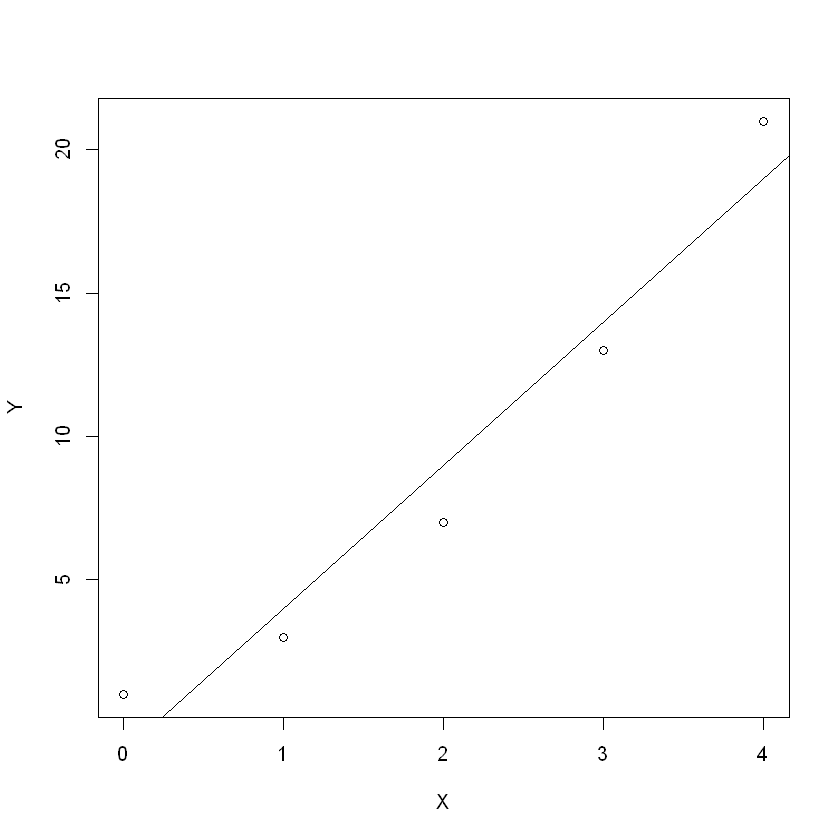

In [5]:
# First try with test data whch should produce slope = 5 and intercept = -1
x <- c(0,1,2,3,4)
y <- c(1,3,7,13,21)
test_data <- data.frame('X' = x, 'Y' = y)


sl_int <- get_slope_intercept_for_feature(test_data, "X", "Y")
with(test_data, plot(X, Y))
abline(coef=rev(sl_int))

[1]    281.9588 -47116.0791


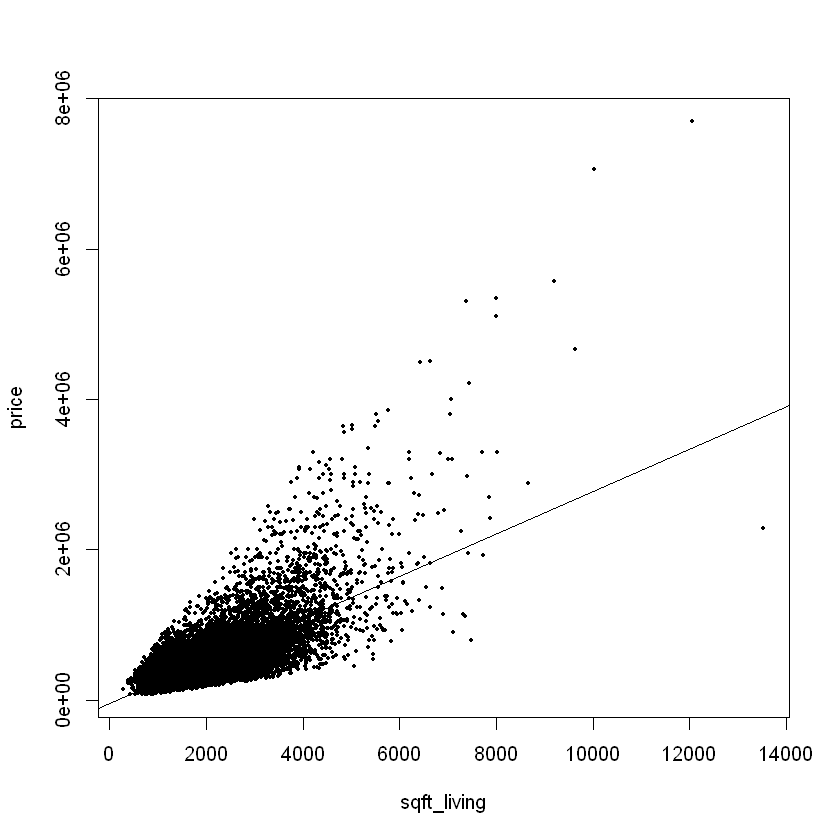

In [6]:
sl_int <- get_slope_intercept_for_feature(train_data, "sqft_living", "price")
print(sl_int)
with(train_data, plot(sqft_living, price,cex=0.6, pch=20:20))
abline(coef=rev(sl_int))

##### Now check against built in regression function

In [7]:
linearMod <- lm(price ~ sqft_living, data=train_data) 
summary(linearMod)
# RSS
sum(resid(linearMod)^2)


Call:
lm(formula = price ~ sqft_living, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1490607  -148265   -23758   105710  4349512 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47116.079   4923.344   -9.57   <2e-16 ***
sqft_living    281.959      2.164  130.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 263000 on 17382 degrees of freedom
Multiple R-squared:  0.4941,	Adjusted R-squared:  0.4941 
F-statistic: 1.698e+04 on 1 and 17382 DF,  p-value: < 2.2e-16


[1] 1.201918e+15

##### Write a function that accepts a column of data ‘input_feature’, the ‘slope’, and the ‘intercept’ you learned, and returns an a column of predictions ‘predicted_output’ for each entry in the input column.

In [8]:
get_regression_prediction <- function(data, input_feature, intercept, slope){
     return(intercept + slope *data[, input_feature])
}

In [15]:
predicted_data <- get_regression_prediction(train_data, "sqft_living", -47116.0791, 281.9588)


##### Using your Slope and Intercept from (4), What is the predicted price for a house with 2650 sqft?

In [10]:
price_for_2650_ft <- -47116.0791 + 2650 * 281.9588
print(price_for_2650_ft)

[1] 700074.7


##### Write a function that accepts column of data: ‘input_feature’, and ‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the Residual Sum of Squares (RSS). e.g. in python:

In [11]:
get_residual_sum_of_squares <- function(data, f_in, f_out, intercept, slope){
    return(sum((data[,f_out] - (intercept + slope * data[,f_in])) ^ 2))
}

##### According to this function and the slope and intercept from (4) What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?

In [12]:
rss1 <- get_residual_sum_of_squares(train_data, 'sqft_living', 'price', -47116.0791, 281.9588)
print(rss1)

[1] 1.201918e+15


Note that although we estimated the regression slope and intercept in order to predict the output from the input, since this is a simple linear relationship with only two variables we can invert the linear function to estimate the input given the output!

Write a function that accept a column of data:‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the column of data: ‘estimated_input’. Do this by solving the linear function output = intercept + slope*input for the ‘input’ variable (i.e. ‘input’ should be on one side of the equals sign by itself). e.g. in python:

In [13]:
inverse_regression_predictions <- function(output, intercept, slope){
    #output = intercept + slope*input
    #input = (output - intercept) / slope
    return((output - intercept) / slope)
}
result = inverse_regression_predictions(800000, -47116.0791, 281.9588)
print(result)

[1] 3004.397


#####  Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.

In [14]:
slint1 = get_slope_intercept_for_feature(data = test_data_house, input_feature = "sqft_living", output_feature = 'price')
print(slint1)

slint2 = get_slope_intercept_for_feature(data = test_data_house, input_feature = 'bedrooms', output_feature = 'price')
print(slint2)

rss1 <- get_residual_sum_of_squares(test_data_house, 'sqft_living', 'price', -28639.8972, 274.9366)
print(rss1)

rss2 <- get_residual_sum_of_squares(test_data_house, 'bedrooms', 'price', 102683.9, 196298.5)
print(rss2)

[1]    274.9366 -28639.8972
[1] 102683.9 196298.5
[1] 2.751686e+14
[1] 7.386445e+14
